In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


# KNN Algorithm
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique.

In [2]:
from IPython.display import Image
Image(url="https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg")

In [3]:
df = pd.read_csv("input/column_2C_weka.csv")
df

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  
1       28.995960     114.405425                  4.564259  Abnormal  
2       46.613539     105.985135                 -3.530317  Abnormal  
3       44.644130     101.868495                 11.211523  Abnormal  
4       40.060784     108.168725                  7.918501  Abnormal  
..            ...            ...                       ...       ...  
305     34.286877     117.449062                 -4.245395    Normal  
306     33.215251     114.365845                 -0.421010    Normal  
307     38.751628     125.670725                 -2.707880    Normal  
308     36.559635     118.545842                  0.214750    Normal  
309     28.767649     123.945244                 -0.199249    Normal  

[310 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df.describe().T

count        mean        std        min         25%  \
pelvic_incidence          310.0   60.496653  17.236520  26.147921   46.430294   
pelvic_tilt numeric       310.0   17.542822  10.008330  -6.554948   10.667069   
lumbar_lordosis_angle     310.0   51.930930  18.554064  14.000000   37.000000   
sacral_slope              310.0   42.953831  13.423102  13.366931   33.347122   
pelvic_radius             310.0  117.920655  13.317377  70.082575  110.709196   
degree_spondylolisthesis  310.0   26.296694  37.559027 -11.058179    1.603727   

                                 50%         75%         max  
pelvic_incidence           58.691038   72.877696  129.834041  
pelvic_tilt numeric        16.357689   22.120395   49.431864  
lumbar_lordosis_angle      49.562398   63.000000  125.742385  
sacral_slope               42.404912   52.695888  121.429566  
pelvic_radius             118.268178  125.467674  163.071041  
degree_spondylolisthesis   11.767934   41.287352  418.543082

First of all, we need to represent the class line with 1-0. For this, I assigned 0 to normal data and 1 to abnormal data.

In [6]:
df["class"] = [ 1 if each == "Abnormal" else 0 for each in df["class"]]
df

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  
0       40.475232      98.672917                 -0.254400      1  
1       28.995960     114.405425                  4.564259      1  
2       46.613539     105.985135                 -3.530317      1  
3       44.644130     101.868495                 11.211523      1  
4       40.060784     108.168725                  7.918501      1  
..            ...            ...                       ...    ...  
305     34.286877     117.449062                 -4.245395      0  
306     33.215251     114.365845                 -0.421010      0  
307     38.751628     125.670725                 -2.707880      0  
308     36.559635     118.545842                  0.214750      0  
309     28.767649     123.945244                 -0.199249      0  

[310 rows x 7 columns]

In [7]:
abnormal = df[df["class"] == 1]
normal = df[df["class"] == 0]

# scatter plot
plt.scatter(abnormal.sacral_slope,abnormal.pelvic_radius,color="red",label="Abnormal",alpha=0.5)
plt.scatter(normal.sacral_slope,normal.pelvic_radius,color="blue",label="Normal",alpha=0.5)
plt.xlabel("sacral_slope")
plt.ylabel("pelvic_radius")
plt.show()

1- Choose K value <br>
2- Find the nearest data points in K <br>
3- Calculate how many of the class nearest neighbors in K <br>
4- Determine which class of point or data we tested belongs to

In [8]:
y = df["class"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
x_data = df.drop(["class"],axis=1) # axis=1 for columns
x_data

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
0       40.475232      98.672917                 -0.254400  
1       28.995960     114.405425                  4.564259  
2       46.613539     105.985135                 -3.530317  
3       44.644130     101.868495                 11.211523  
4       40.060784     108.168725                  7.918501  
..            ...            ...                       ...  
305     34.286877     117.449062                 -4.245395  
306     33.215251     114.365845                 -0.421010  
307     38.751628     125.670725                 -2.707880  
308     36.559635     118.545842                  0.214750  
309     28.767649     123.945244                 -0.199249  

[310 rows x 6 columns]

# Normalization

In [10]:
# normalization: I represent the data to a value between 0 and 1 for more accurate processing.
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.355688             0.519900               0.229180   
1            0.124501             0.296783               0.098578   
2            0.411666             0.513932               0.322995   
3            0.416151             0.557414               0.271260   
4            0.227272             0.289479               0.128129   
..                ...                  ...                    ...   
305          0.209822             0.360293               0.196881   
306          0.268009             0.487194               0.136211   
307          0.340438             0.522443               0.287897   
308          0.184257             0.272352               0.246846   
309          0.074202             0.207709               0.202620   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
0        0.250857       0.307461                  0.025148  
1        0.144629       0.476649                  0.036365  
2        0.307661       0.386097                  0.017523  
3        0.289436       0.341826                  0.051838  
4        0.247022       0.409579                  0.044173  
..            ...            ...                       ...  
305      0.193591       0.509380                  0.015858  
306      0.183674       0.476223                  0.024761  
307      0.234907       0.597796                  0.019437  
308      0.214623       0.521175                  0.026240  
309      0.142517       0.579240                  0.025277  

[310 rows x 6 columns]

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# KNN Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors => key value
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [13]:
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1])

In [14]:
print("{} nn score: {} ".format(3,knn.score(x_test,y_test)*100))

3 nn score: 75.26881720430107 


I said an estimated 3. Here, a method can be used to find the n_neighbors value.

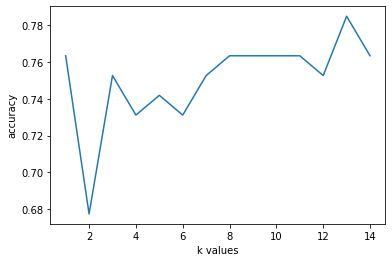

In [15]:
# find k value
score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

As can be seen in the graph, the most accurate value is the number 13. So we write the value 13 in the n_neighbors section.

In [16]:
print("{} KNN score: {} ".format(13,knn.score(x_test,y_test)*100))

13 KNN score: 75.26881720430107 
